# Case Study: Classification

This dataset is a **classification problem**, concerning whether if the loan was approved or not.

- **Loan_ID** - unique loan ID
- **Gender** - male/female
- **Married** - yes/no
- **Dependents** - number of dependents
- **Education** - graduate/undergraduate
- **Self_Employed** - yes/no
- **ApplicantIncome** - applicant income
- **CoapplicantIncome** - coapplicant income
- **LoanAmount** - loan amount in thousands
- **Loan_Amount_Term** - term of lean in months
- **Credit_History** - credit history meets guidelines
- **Property_Area** - Urban/semi and Rural
- **Loan_Status** - approved yes/no 

We are given 2 set, the training set and the test set.

The **training set** contains 614 samples and 13 features, 12 of which are the independent variables and the last feature `Loan_Status` is the dependent variable.

The **test set** contains 367 samples with the same 12 features but without the `Loan_Status` columns. So it will be representing the unseen data that we will be implementing our model on.

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'2.2.3'

In [3]:
np.__version__

'2.0.2'

In [4]:
import matplotlib
matplotlib.__version__

'3.9.2'

## 1. Load the data

In [5]:
#get the data from google classroom
#kaggle competition
df_train = pd.read_csv("data/train_LoanPrediction.csv")
df_test  = pd.read_csv("data/test_LoanPrediction.csv")

In [6]:
#1. get the shape (rows, columns)
df_train.shape  #(614 rows, 13 columns)

#2. try .head()
df_train.head()
# df_train.info()

#3. try .describe()
# df_train.describe()

#4. check whether our data class is balanced, using value_counts(normalize=True)
# df_train['Loan_Status'].value_counts() #if you don't put normalize=True, will give you raw number

#our class is imbalanced....
#it means, we have to downsample Y, to equal N

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df_train['ApplicantIncome'].max()

np.int64(81000)

In [8]:
condMaxAI = df_train['ApplicantIncome'] == 81000
df_train[condMaxAI]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


In [9]:
df_train.loc[409]

Loan_ID              LP002317
Gender                   Male
Married                   Yes
Dependents                 3+
Education            Graduate
Self_Employed              No
ApplicantIncome         81000
CoapplicantIncome         0.0
LoanAmount              360.0
Loan_Amount_Term        360.0
Credit_History            0.0
Property_Area           Rural
Loan_Status                 N
Name: 409, dtype: object

In [10]:
df_train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

### Balance the class

- We need to balance the label in the training set, because imbalanced class affects the model during training
- If we do not balance the class, you can also try look at the SMOTE (https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) algorithm which dynamically augments data on the fly.

In [11]:
#1. set the cond = Y, and cond = N
condY = df_train.Loan_Status == 'Y'  #to 0 or 1
condN = df_train.Loan_Status == 'N'

#2.. df[condY].sample(n = 192)
#    df[condN].sample
#    we do this many times, do whole ML thing, and do the average....
df_trainY = df_train[condY].sample(n=192, random_state=999)
df_trainN = df_train[condN] #also 192

#3. concat these two dfs
df_train = pd.concat([df_trainY, df_trainN])

df_train.Loan_Status.value_counts()


Loan_Status
Y    192
N    192
Name: count, dtype: int64

### Label encoding

This is a useful step to do before EDA, so that categories are turned into numbers.


In [12]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
#do label encoding the Loan Status
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train['Loan_Status'] = le.fit_transform(df_train['Loan_Status'])

#very interesting...our testing set has no loan status, because this is actually a real testing set....

print("I want to know the mapping of 0 and 1", le.inverse_transform([0, 1]))

I want to know the mapping of 0 and 1 ['N' 'Y']


In [14]:
#label encode education as well
df_train['Education'] = le.fit_transform(df_train['Education'])
df_test['Education']  = le.transform(df_test['Education'])

#optionally you can use pd.map
#df_train.map({'Graduate': 0, 'Not Graduate': 1})

In [15]:
#label encode gender as well
df_train['Gender'] = le.fit_transform(df_train['Gender'])
df_test['Gender']  = le.transform(df_test['Gender'])

In [16]:
#label encode married as well
df_train['Married'] = le.fit_transform(df_train['Married'])
df_test['Married']  = le.transform(df_test['Married'])

In [17]:
#label encode self employed as well
df_train['Self_Employed'] = le.fit_transform(df_train['Self_Employed'])
df_test['Self_Employed']  = le.transform(df_test['Self_Employed'])

In [18]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
294,LP001947,1,1,0,0,0,2383,3334.0,172.0,360.0,1.0,Semiurban,1
501,LP002606,0,0,0,0,0,3159,0.0,100.0,360.0,1.0,Semiurban,1
323,LP002055,0,0,0,0,0,3166,2985.0,132.0,360.0,NaN,Rural,1
467,LP002501,2,1,0,0,0,16692,0.0,110.0,360.0,1.0,Semiurban,1
476,LP002529,1,1,2,0,0,6700,1750.0,230.0,300.0,1.0,Semiurban,1


### One hot encoding

In [19]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
df_train.Property_Area.value_counts()

Property_Area
Semiurban    135
Urban        131
Rural        118
Name: count, dtype: int64

In [21]:
#why one-hot encode Property Area, not encode it into 0, 1, 2
#if we have more than two categories, if we encode into 0, 1, 2
#we create a unintentional order, i.e., the model "may" think that 0 < 1 < 2

#what if we have like 5000 categories....
    #one hot encode this will result in 5000 columns --> this introduces burden to the machine learning model
    #1. NLP --> we basically do like this....
    #2. General case -->
        #1st:  Group these categories into bigger categories, and then one-hot encode
        #2nd:  (not so good) - do label encoding anyway......but note the possible order effect
        
#one hot encoding
#[1, 0, 0], [0, 1, 0], [0, 0, 1]
#one thing you need to know is that you can always cut down one column
#[1, 0], [0, 1], [0, 0]  ==> this is possible, and will save you one more column...
#also this is recommended, because it will not introduce unwanted correlation.....
#this is done by setting "drop_first=True"

df_train = pd.get_dummies(df_train, columns=['Property_Area'], drop_first=True)
df_test  = pd.get_dummies(df_test,  columns=['Property_Area'], drop_first=True)

In [22]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
294,LP001947,1,1,0,0,0,2383,3334.0,172.0,360.0,1.0,1,True,False
501,LP002606,0,0,0,0,0,3159,0.0,100.0,360.0,1.0,1,True,False
323,LP002055,0,0,0,0,0,3166,2985.0,132.0,360.0,NaN,1,False,False
467,LP002501,2,1,0,0,0,16692,0.0,110.0,360.0,1.0,1,True,False
476,LP002529,1,1,2,0,0,6700,1750.0,230.0,300.0,1.0,1,True,False


### Fix some value in Dependents

In [23]:
df_train.Dependents.unique()

array(['0', '2', '1', nan, '3+'], dtype=object)

In [24]:
df_train.Dependents.replace('3+', 3, inplace=True)

/var/folders/1v/1h7r513n71j7569x87spb4b40000gn/T/ipykernel_219/604597994.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.Dependents.replace('3+', 3, inplace=True)


In [25]:
df_train.Dependents.unique()

array(['0', '2', '1', nan, 3], dtype=object)

## 2. EDA (Exploratory Data Analysis)

In [26]:
#0. Check the data type
df_train.dtypes
df_train.drop(columns = ['Loan_ID'], inplace=True)  #this is not a useful feature....
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [27]:
import seaborn as sns

#1. You want to divide into categorical and numerical columns using select_dtypes
df_train.dtypes
num_col = df_train.select_dtypes(include=['int64', 'float64'])
# numcol = numcol.drop([]) #Loan_Status
cat_col = df_train.select_dtypes(exclude=['int64', 'float64'])
num_col.columns, cat_col.columns

(Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
        'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
        'Loan_Status'],
       dtype='object'),
 Index(['Dependents', 'Property_Area_Semiurban', 'Property_Area_Urban'], dtype='object'))

### Bar plots

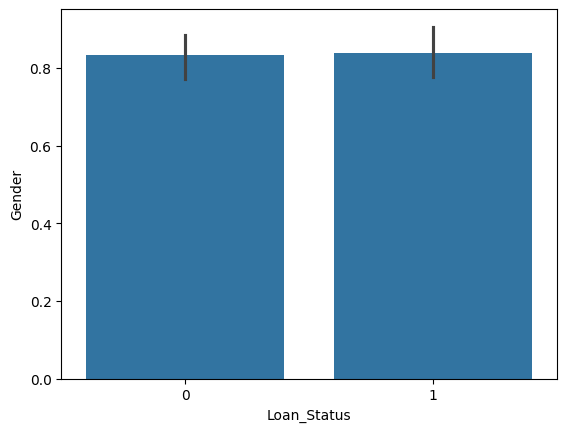

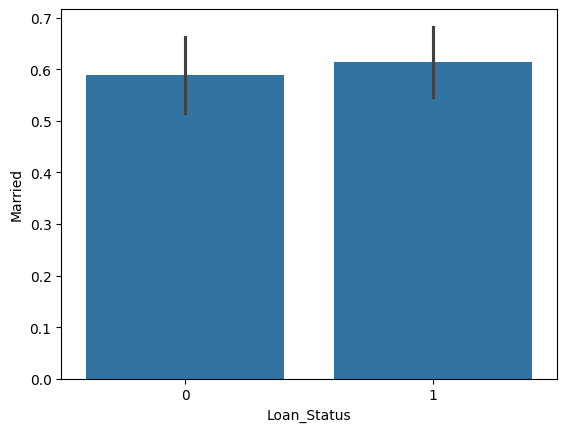

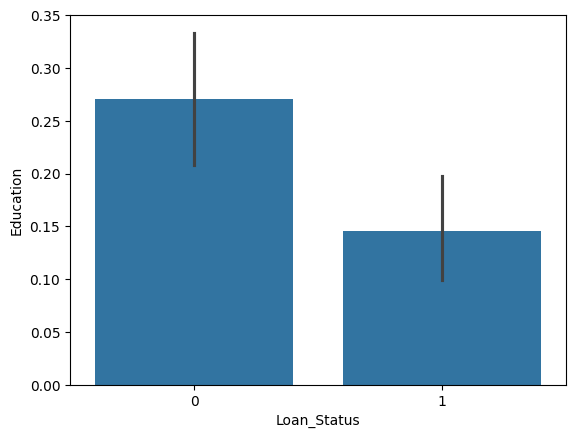

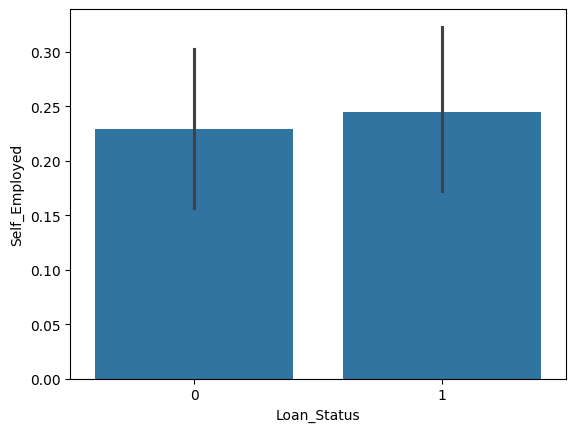

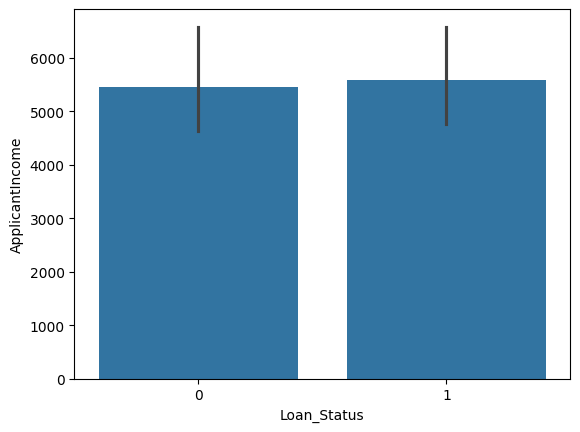

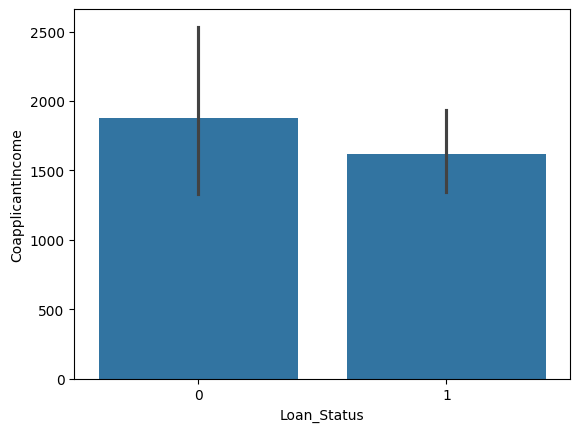

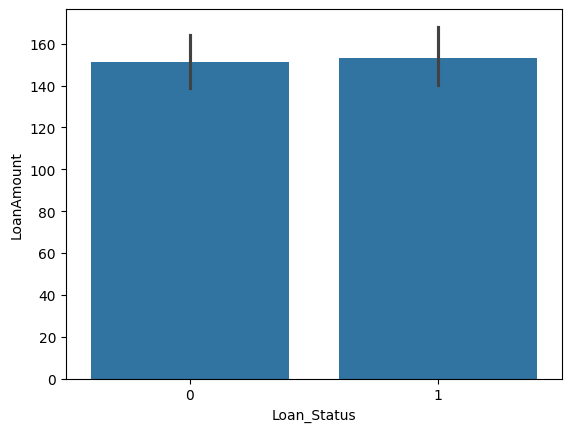

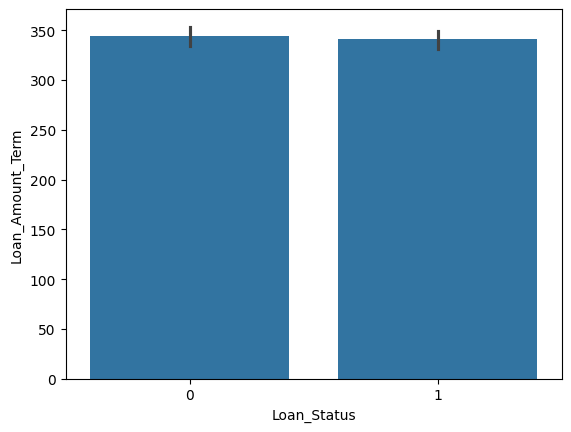

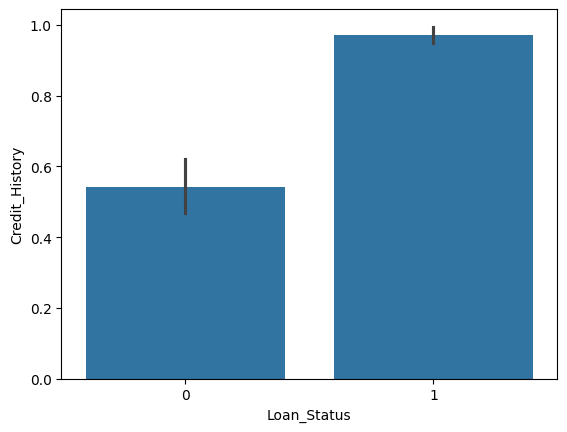

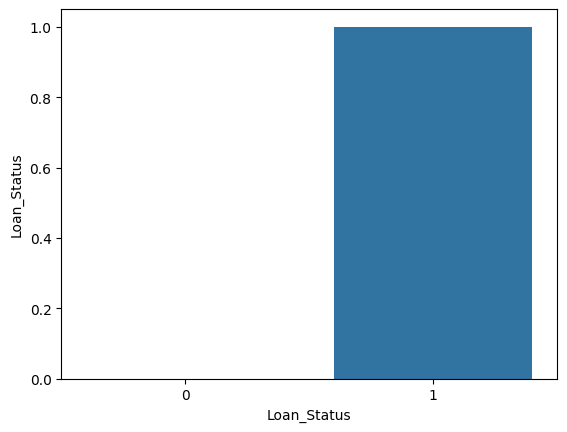

In [28]:
#2. for numerical type, lets plot some a bar plot with Loan Status
for col in num_col.columns:
    sns.barplot(x = df_train['Loan_Status'], y = df_train[col])
    plt.show()

### Countplot / Histogram

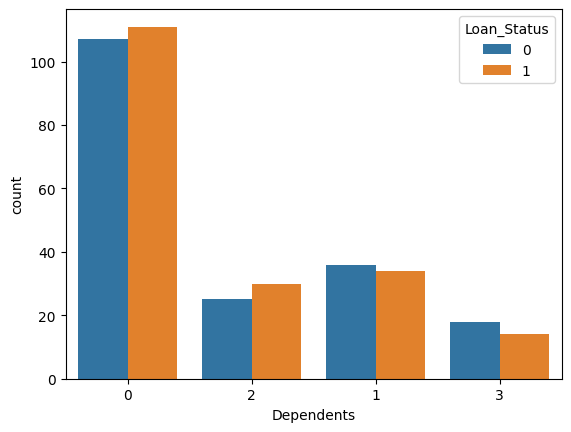

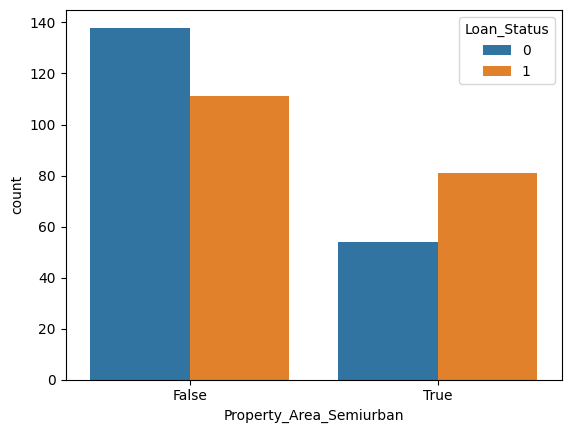

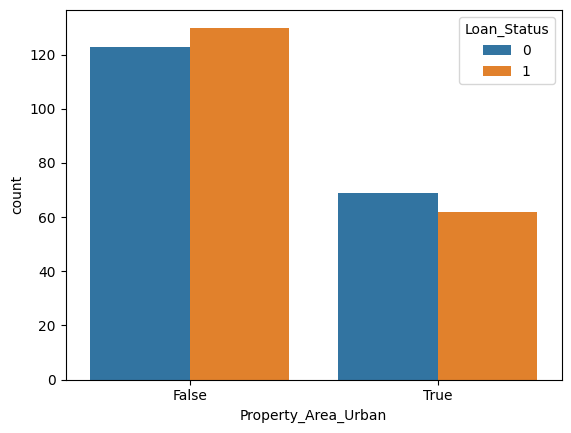

In [29]:
#3. for categorial type, you may want to use countplot with Loan Status
for col in cat_col.columns:
    sns.countplot(x = df_train[col], hue = df_train['Loan_Status'])
    #similar to hue in scatterplot
    plt.show()
    # sns.countplot()  #because categorical, you need to count, not simply use the magnitude...so cannot use bar...

### Correlation matrix

<Axes: >

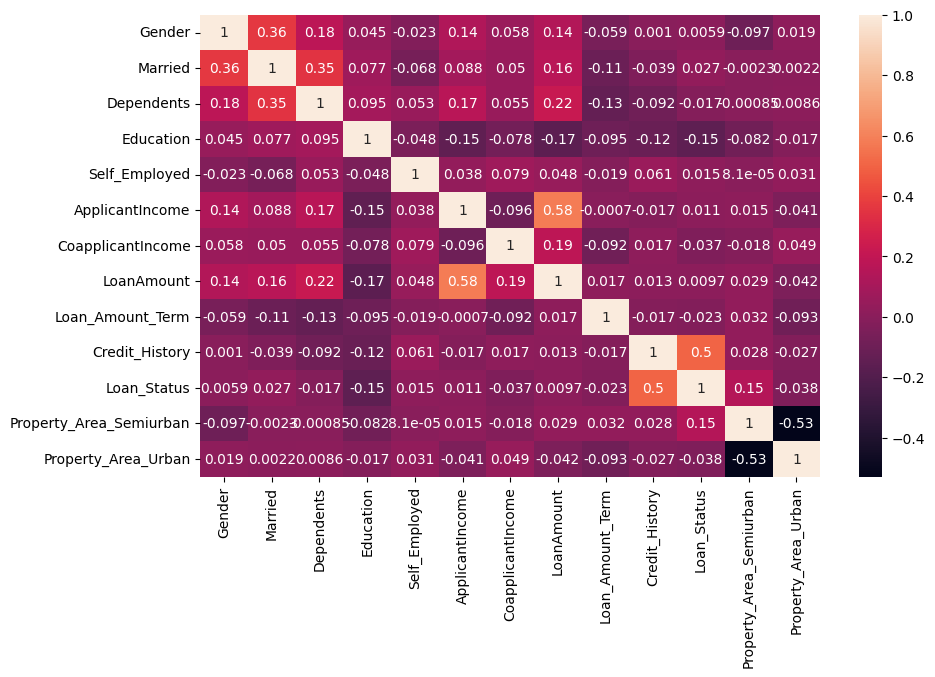

In [30]:
#change figure size
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.corr(), annot=True)  #this is only for numeric values....

## 3. Feature Engineering

Skipped

## 4. Feature Selection

Since our dataset is already splitted at the dataset level, thus we do not need to hurry to select the features.  We can preprocess and then select later.

We can also use forward selection - process of starting with one feature, and slowly adding one feature at a time, until the performance does not improve by certain threshold you want.

## 5. Preprocessing

### Null values

In [31]:
#1. please check the missing value in df_train, and of course df_test
df_train.isna().sum()

#Gender:            majority or ratio
#Dependents:        majority or ratio
#Self_Employed:     majority or ratio
#LoanAmount:        median or mean
#Loan_Amount_Term:  majority or ratio
#Credit_History:    majority or ratio

Gender                      0
Married                     0
Dependents                  9
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 14
Loan_Amount_Term           10
Credit_History             28
Loan_Status                 0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

If we have a missing categorical feature, we can replace with three things:
- mode (most frequent) --> bad
- ratio (keep the ratio intact) --> preferred
- "No category" --> believe replacing is not a good option

In [32]:
ratio = df_train['Credit_History'].value_counts(normalize=True)
print(ratio)

Credit_History
1.0    0.755618
0.0    0.244382
Name: proportion, dtype: float64


In [33]:
ratio.dtypes

dtype('float64')

In [34]:
type(ratio)

pandas.core.series.Series

In [35]:
# #either replace with the majority or keep the ratio
# #majority is good when the majority takes over like 90% of the population
# #otherwise, ratio is better

# #in this case, it's better to fill the missing value with ratio
# #ratio means that we want to keep the ratio 75 25 AFTER filling....
print("Credit history of 1: ", ratio[1])
print("Credit history of 0: ", ratio[0])
print(ratio.index)


Credit history of 1:  0.7556179775280899
Credit history of 0:  0.2443820224719101
Index([1.0, 0.0], dtype='float64', name='Credit_History')


In [36]:
# #we gonna fill the missing value such that the ratio is kept unchanged
# #format: fillna(pd.Series(random.choice(1, 0), p=probability of the ratios), inplace=True)
missing = df_train.Credit_History.isna().sum()

num1 = int(np.round(ratio[1] * missing))
num0 = int(np.round(ratio[0] * missing))

print(num1, num0)


21 7


In [37]:
df_train['Credit_History'].fillna(1.0, limit = num1, inplace=True)
df_train['Credit_History'].fillna(0.0, limit = num0, inplace=True)

#pd.series is ok, but i feel like limit is much easier

/var/folders/1v/1h7r513n71j7569x87spb4b40000gn/T/ipykernel_219/3718494736.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Credit_History'].fillna(1.0, limit = num1, inplace=True)
/var/folders/1v/1h7r513n71j7569x87spb4b40000gn/T/ipykernel_219/3718494736.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [38]:
df_train['Credit_History'].isna().sum()

np.int64(0)

In [39]:
#fill the missing for the test set for credit history

#number of missing values
missing = df_test['Credit_History'].isna().sum()

#get the row index where the missing values located at
cond = df_test['Credit_History'].isna()  #list of true and false
missing_index = df_test[cond].index

#get ratio
ratio = df_test['Credit_History'].value_counts(normalize=True)
print("Test ratio: ", ratio)

series = pd.Series(np.random.choice((1, 0), p=[ratio[1], ratio[0]], size=missing), index=missing_index)
print(series.value_counts(normalize=True))

print("Before: ", df_test['Credit_History'].isna().sum())
print("Before: ", df_test['Credit_History'].value_counts(normalize=True))

df_test['Credit_History'].fillna(series, inplace=True)
df_test['Credit_History'].isna().sum()

print("After: ", df_test['Credit_History'].isna().sum())
print("After: ", df_test['Credit_History'].value_counts(normalize=True))

Test ratio:  Credit_History
1.0    0.825444
0.0    0.174556
Name: proportion, dtype: float64
1    0.862069
0    0.137931
Name: proportion, dtype: float64
Before:  29
Before:  Credit_History
1.0    0.825444
0.0    0.174556
Name: proportion, dtype: float64
After:  0
After:  Credit_History
1.0    0.828338
0.0    0.171662
Name: proportion, dtype: float64


/var/folders/1v/1h7r513n71j7569x87spb4b40000gn/T/ipykernel_219/3923142019.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Credit_History'].fillna(series, inplace=True)


median: 128.0; mean: 152.14864864864865


/var/folders/1v/1h7r513n71j7569x87spb4b40000gn/T/ipykernel_219/2701338885.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)


Gender                      0
Married                     0
Dependents                  9
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term           10
Credit_History              0
Loan_Status                 0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

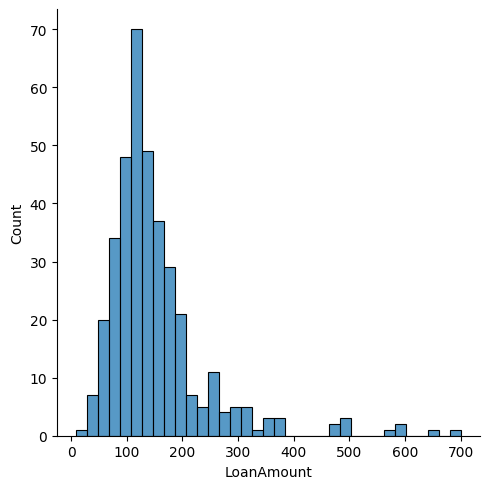

In [40]:
sns.displot(df_train.LoanAmount)
print(f"median: {df_train.LoanAmount.median()}; mean: {df_train.LoanAmount.mean()}")

#can you guys help me fill in the LoanAmount with median()
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)

df_train.isna().sum()

Here I stop because I am too lazy as the rest of the features won't be used for training.

In [41]:
df_test.isna().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                 10
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  5
Loan_Amount_Term            6
Credit_History              0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

### Scaling

In [42]:
#StandardScaler is usually used for continuous values
#here, Education, Credit_History, and Property Area are all categorical
#standardizing them will lose the category, so we will not do!!!

## 6. Modeling

In [43]:
#1. set the X and y
X_train = df_train[ ['Education', 'Credit_History', 'Property_Area_Semiurban', 'Property_Area_Urban'] ]
y_train = df_train['Loan_Status']

X_test = df_test[ ['Education', 'Credit_History', 'Property_Area_Semiurban', 'Property_Area_Urban'] ]
#no y_test, because this dataset does not have the answer....

#2. make sure the shape of X is (samples, features), and y is (samples, )
assert X_train.ndim == 2
assert X_test.ndim  == 2
assert y_train.ndim == 1

print("(samples, features): ", X_train.shape)
print("(samples,         ): ", y_train.shape)
print("(samples, features): ", X_test.shape)


(samples, features):  (384, 4)
(samples,         ):  (384,)
(samples, features):  (367, 4)


In [44]:
#3. perform cross validation with a selected set of models, to scope down which model is among the best

#3.1 specify the list of algorithms
#this is for classification
##Baselines
from sklearn.linear_model import LogisticRegression  #drawing a line based on linear regression but used for classification
from sklearn.naive_bayes import GaussianNB  #drawing a line based on probability

##Situational (but we don't use much)
from sklearn.neighbors import KNeighborsClassifier

##Complex
from sklearn.ensemble import RandomForestClassifier  #using trees to classify
from sklearn.svm import SVC  #drawing a line based on maximum distance
from sklearn.ensemble import GradientBoostingClassifier  #<<-------is the MOST complex
    #XGBoost but is not in sklearn, import XGBoost #<---most powerful algorithm for tabular data (not images, signal)

#any random_state you can use......up to you 
lr = LogisticRegression(random_state=999)
rf = RandomForestClassifier(random_state=999)
sv = SVC(random_state=999)

models = [lr, rf, sv]

#3.2 perform cross validation using KFold
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 5, shuffle = True, random_state=999)

for model in models:
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')  #f1, recall, precision, accuracy
    print("Scores: ", score, "- Scores mean: ", score.mean(), "- Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
    #lr, rf, sv

#when they are very close, 
    #how we choose?  we choose the simplest model...
    #what does simplest mean?  LogisticRegression is simplest, and SVM is the most complex....
    
#overfitting vs. underfitting
#overfitting means your model learns too much about the training set, 
    #so it cannot generalize to validation set or testing set (unseen data)
    #is NOT good - it means your model CANNOT GENERALIZE to unseen data (validation or test set)
    
#underfitting means your model just fail to see any patterns in the training set
    #this is easy: just look at score

Scores:  [0.74025974 0.63636364 0.74025974 0.72727273 0.73684211] - Scores mean:  0.7161995898838005 - Scores std (lower better):  0.04020022129173056
Scores:  [0.74025974 0.63636364 0.74025974 0.72727273 0.68421053] - Scores mean:  0.7056732740943268 - Scores std (lower better):  0.04030746602254514
Scores:  [0.74025974 0.63636364 0.74025974 0.72727273 0.68421053] - Scores mean:  0.7056732740943268 - Scores std (lower better):  0.04030746602254514


In [45]:
#4. grid search to find the best version of that model
#remind you: grid search is BASICALLY same as cross validation but for the same model

from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=999)  #<----this is the model I choose, after cross validation

param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear']  #this is listed in the sklearn website

#add more parameters here
#param_grid[parameter] = list of parameters to search

#refit means it will pick the best model, and fit again, so it means grid is already the best model after this line
grid = GridSearchCV(model, param_grid, scoring="accuracy", cv=kfold, refit=True, return_train_score=True)
#scoring = f1, recall, precision, accuracy

#fit the grid, which will basically do cross validation across all combinatiosn, here we only have 3 comb
grid.fit(X_train, y_train)  #remember to use only training set here....

#print the best parameters and accuracy
# print(grid.best_params_)
# print(grid.best_score_)
print(grid.cv_results_)

#this score is cross-validation score, basically the accuracy/precision/etc on the validation set


{'mean_fit_time': array([0.00270071, 0.00186033, 0.00132155]), 'std_fit_time': array([1.00988321e-03, 1.26235953e-04, 6.69666818e-05]), 'mean_score_time': array([0.00099688, 0.000844  , 0.00077581]), 'std_score_time': array([2.82177203e-04, 7.10948052e-05, 1.71210438e-05]), 'param_solver': masked_array(data=['newton-cg', 'lbfgs', 'liblinear'],
             mask=[False, False, False],
       fill_value=np.str_('?'),
            dtype=object), 'params': [{'solver': 'newton-cg'}, {'solver': 'lbfgs'}, {'solver': 'liblinear'}], 'split0_test_score': array([0.74025974, 0.74025974, 0.74025974]), 'split1_test_score': array([0.63636364, 0.63636364, 0.63636364]), 'split2_test_score': array([0.74025974, 0.74025974, 0.77922078]), 'split3_test_score': array([0.72727273, 0.72727273, 0.72727273]), 'split4_test_score': array([0.73684211, 0.73684211, 0.73684211]), 'mean_test_score': array([0.71619959, 0.71619959, 0.7239918 ]), 'std_test_score': array([0.04020022, 0.04020022, 0.0472641 ]), 'rank_test_sco

### Classification metrics

Let us study some classification metrics that are quite different from the $r^2$ or mean squared error that we see from the regression.  Let me define a confusion matrix that looks like this:

<code>
		 	    Actual
			    +	   -
Predicted +     TP     FP
          -     FN     TN
</code>

TP is defined as true positives, FP as false positives, FN as false negatives, and TN as true negatives.

#### Accuracy, Recall, Precision, F1

Accuracy is straightforward

$$ \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} $$

**Accuracy** is mostly avoided, unless your model is really balanced of both positives and negatives.  Instead, more useful classification metrics would be precision, recall, and f1-score

$$ \text{Precision} = \text{TP} / (\text{TP} + \text{FP}) $$

**Precision** is useful as metric when you want to prioritize removing false positive.  Example is search engine in which you do not want to return any search results that are "false positive"

$$ \text{Recall} = \text{TP} / (\text{TP} + \text{FN}) $$

**Recall** is useful as metric when you want to prioritize removing false negative.  Example is cancer detection in which you do not want to miss detecting any real positive (i.e., false negative).

$$ \text{F1} = 2 x \frac{\text{Precision} * \text{Recall}}{\text{Precision} + \text{Recall}} $$

**F1** is simply seeking a balance between Precision and Recall.  Also F1 is good metric when there is an uneven class distribution (large number of actual negatives)

sklearn provides a easy-to-use <code>**sklearn.metrics.classification_report**.</code> API that report these four metrics:

0.8333333333333334
0.75
1.0
0.8571428571428571
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



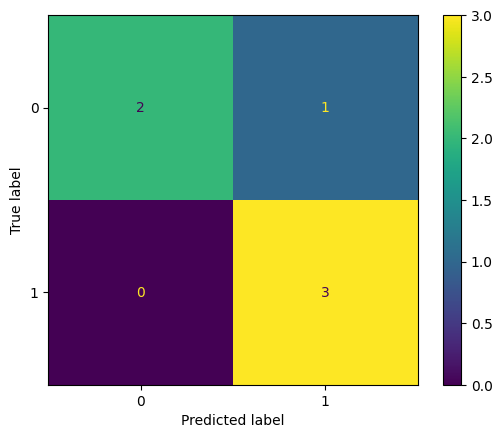

In [46]:
#confusion matrix 
'''
T = True, F = False
P = Positive, N = Negative
'''

''' 
                        Actual
                    P               N
             P     TP              FP
predict   
             N     FN              TN
'''

#0 here is negative
#1 here is positive

y     = [0, 0, 1, 1, 0, 1]
ypred = [1, 0, 1, 1, 0, 1]

#accuracy = (TP + TN) / (TP + FP + FN + TN)
#accuracy = 3 + 2  /  6 = 5 / 6 = 83%

#but accuracy is NOT good if your data is imbalanced (see actual y)

#recall, precision, f1-score
#recall = TP  / (TP + FN)
#recall = 3   / (3  + 0) = 100%  Recall is used when you don't like FN, e.g., critical - cancer, zombie, terrorists

#precision = TP / (TP + FP)
#precision = 3 /  (3 + 1) = 75% Precision is used when you don't like FP, e.g., search engine

#f1-score = 2 * ( (recall * precision) / (precision + recall) )
        #when precision and recall are both important.....
        #   2 * ( (1      * 0.75)     /   (0.75     +    1  ) )
        
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#if you want all in one table
from sklearn.metrics import classification_report

#if you want the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#format (ytrue, ypred)
print(accuracy_score(y, ypred))
print(precision_score(y, ypred))
print(recall_score(y, ypred))
print(f1_score(y, ypred))

print(classification_report(y, ypred))

cm = confusion_matrix(y, ypred)
cmp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])

cmp.plot()

#for regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Let's explain the classification report a bit:

- <code>weight_avg</code> mutiplies score with the number of true labels in that class, favoring the majority label
#macro simply average, thus better for imbalanced dataset

- <code>macro_avg</code> 

- <code>support</code> refers to number of samples belonging to that class

Between precision or recall or f1?
- Use **recall** for dangerous stuffs - healthcare, security, fraud. You don't care about false positives too much (i.e., false alarm) because you want to always stay fully cautious.

- Use **precision** for search/identifying something - HR, search engine, etc.  You care a lot about false positive, i.e., you want to identify really good sample.

- Use **f1-score** - basically a good bet for almost all imbalanced dataset.

Final recommendations:
- in balanced dataset, just simply use <code>accuracy</code>
- in imbalanced dataset, use <code>macro avg f1-score</code> or <code>macro precision</code> or <code>macro recall</code>

## 7. Testing

In [47]:
pred_y = grid.predict(X_test)

print(pred_y)

#if we have y_test
#precision_score(y_test, pred_y)

#three cases (assume I have y_test):
    #if I got score much lower than 0.7, e.g., 0.5 0.4, i have serious overfitting issue
    #if I got score near 0.7 or just a little lower, or just a little higher, like 0.65 0.6 0.75, i think its ok
    #if I got score like much much higher than 0.7, like 0.95, something is wrong.....maybe your test set is broken or something
        #but this case rarely happens!
        
#overfitting means your model CANNOT GENERALIZE to unseen data....your unseen data can be validation or test set....

[1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0
 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1
 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0
 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1]


Since I don't really have the ground truth, I don't know the goodness of my model.  But let's assume I make some fake ground truth:

In [48]:
fake_y_test = np.random.randint(0, 2, size = (pred_y.shape))

In [49]:
accuracy_score(fake_y_test, pred_y)  #precision_score, recall_score, classification_report, confusion_matrix

0.5313351498637602

## 8. Analysis: Feature Importance

- Basically understanding which features are important for prediction
- Different algorithms have different way for feature importance
- For Logistic Regression, similar to Linear Regression, you can look at the coeffients/weights/slope

In [50]:
grid.best_estimator_

LogisticRegression(random_state=999, solver='liblinear')

In [51]:
grid.best_estimator_.coef_
#['Education', 'Credit_History', 'Property_Area_Semiurban', 'Property_Area_Urban']

#predict LoanStatus, LoanAmount

array([[-0.56963133,  2.69845542,  0.70551485,  0.11099812]])

<Axes: ylabel='features'>

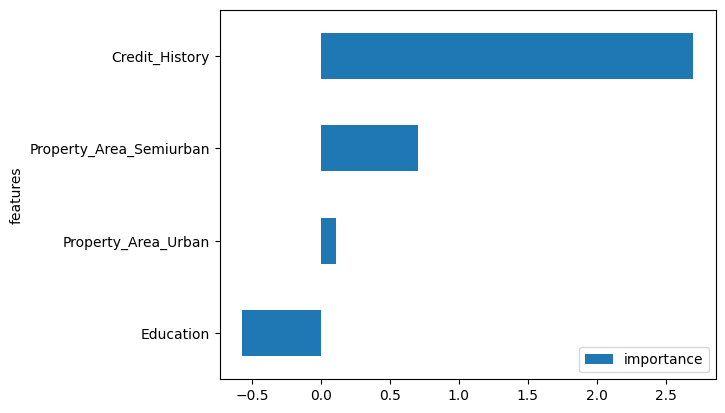

In [52]:
feature_importance = pd.DataFrame(['Education', 'Credit_History', 'Property_Area_Semiurban', 'Property_Area_Urban'], 
                                  columns=['features'])
feature_importance["importance"] = grid.best_estimator_.coef_[0]

feature_importance = feature_importance.sort_values(by = ['importance'], ascending=True)

feature_importance.plot.barh(x='features', y='importance')

## 9. Inference

In [53]:
import pickle

# save the model
filename = 'model/Loan_Prediction.pkl' # pkl does not matter, you can do .everything
pickle.dump(grid, open(filename,'wb'))

# Load the model
loaded_grid=pickle.load(open(filename,'rb'))

# if you have new data, then you fit again....but using loaded_grid
# which is a process of training more.....once you have more data....

# or another way is
# put all the dataset together, and train like it is new
    #this is possible ONLY if your dataset is not that big......

In [54]:
#let's try to create one silly example
df_train[['Education', 'Credit_History', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status']].loc[1]

Education                      0
Credit_History               1.0
Property_Area_Semiurban    False
Property_Area_Urban        False
Loan_Status                    0
Name: 1, dtype: object

In [55]:
sample = np.array([[0, 1, 0, 0]])

In [56]:
predicted_loan_status= loaded_grid.predict(sample)
predicted_loan_status

/Users/chaklam/Github/Machine-Learning/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

It's wrong!  So certainly we need to improve the model :-)